In [1]:
import pandas as pd
import numpy as np
import glob
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns

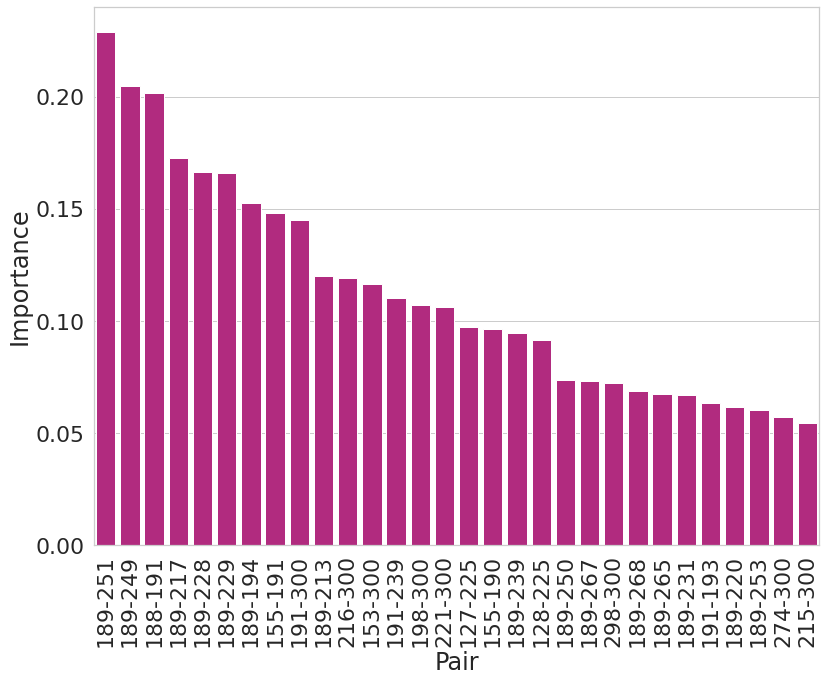

In [2]:
## COMPOSITE FEATURE SCORE ##
    
# STEP1 --> Create a dictionary of score datasets (from N rounds of classification) #
list= sorted(glob.glob("datafiles/Workflow1/output/featureranking/firstclassificationwithallfeatures/RF1-PhaseII-seed*.csv"))
#print(list)
data={}
for idx, file in enumerate(list):
    data["data{0}".format(idx)] = pd.read_csv(file)
    data["data{0}".format(idx)].columns = ['pair', 'importance', 'cumulative']
#print(data['data1'])

### STEP2 --> COMPUTE COMPOSITE SCORE ####

# List the features appearing important from all score datasets #
# Create a new dataset merging these features and their scores # 
pairs = []
df1 = pd.DataFrame()
for n, (name, df) in enumerate(data.items()):
    #print(len(df))
    for i in range(len(df)):
        feature = (df['pair'][i])
        value = df['importance'][i]
        df1.assign(pair=feature)
        pairimp = pd.DataFrame({'Pair':feature, 'Importance':value}, index=[0])
        df1 = pd.concat([df1, pairimp], ignore_index=True)
#print(df1)

# Get the count of each feature across multiple rounds of classification (from the new merged dataset) # 
count = {}
for i in df1.Pair.ravel():
    if not i in count:
        count[i] = 1
    else:
        count[i] +=1
#print(count)
    
# Generate a composite feature importance plot #
# Add the scores of a feature that appears important multiple times during classification #

df2 = df1.groupby(by=["Pair"]).sum().sort_values(ascending=False, by='Importance').reset_index()
df3 = df2.iloc[:30] 
#print(df3)
#df3.to_csv("RF1PhaseIICompositeFeatureScore", sep=",") 

sns.set(font_scale = 2)
sns.set_style('whitegrid')
fig=plt.figure(figsize=(12, 10))
sns.barplot(x=df3['Pair'], y=df3['Importance'], color="mediumvioletred")
plt.xticks(rotation='vertical')
plt.tight_layout()
#plt.savefig("compositefeatureimportance.png", dpi=300)
plt.show()